## M5 Sales Forecasting
#### Objective - Overall objective it to forecast the sales of products for a given store in future horizon

#### Aproach followed:
#### 1. Prepare the dataset showing the sales as per the stores. So that sales can be predicted for each store for future horizone.
#### 2. Build the SARIMAX model for forecasting sales of any one store (here CA_1 store)
####    -- Check if the series has auto correlation or not - Durbin Watson Test
####    -- Check the time series components, decompose the series
####    -- Check whether time series data is stationary or not, use Augmented Dickey Fuller Test
####    -- Indentify the p,d,q parameters for Trend and Seasonality in time series
####    -- Iterate over diffrent values of parameters and choose those giving minimum AIC value
#### 3. Building the model of sales forecasting for CA_1 store using auto-arima methodology, pmdarima
#### 4. Using the auto-arima for all the store's sales forecasting

#### NOTE - All the models demnostrate the learnings and methodology used to achieve the objective. Focus was more on implemetning the models rather than improving those for further accuracy

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
sell_prices = pd.read_csv('sell_prices.csv')

In [41]:
calendar = pd.read_csv('calendar.csv')

In [42]:
sales_train_validation = pd.read_csv('sales_train_validation.csv')

#### Prepare the dataset showing the sales as per the stores. So that sales can be predicted for each store for future horizone.

In [43]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [44]:
store_data = sales_train_validation.drop(columns=['id','item_id','dept_id','cat_id','state_id'])

In [45]:
store_data = store_data.groupby(store_data['store_id']).sum()
store_data

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


In [46]:
store_data['d'] = store_data.index
store_data_T = store_data.transpose() 
store_data_T['d'] = store_data_T.index
store_data_T

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,d
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,d_1
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,d_2
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,d_3
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,d_4
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,d_5
...,...,...,...,...,...,...,...,...,...,...,...
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,d_1910
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,d_1911
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,d_1912
d_1913,6113,6082,7721,3271,4033,4292,3957,4874,5127,4325,d_1913


In [47]:
store_sales = store_data_T.merge(calendar, on='d')

In [48]:
store_sales.head()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [49]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [50]:
store_sales.set_index('date', inplace=True)

In [51]:
store_sales.head()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [52]:
Store_sales_only = store_sales.iloc[:,0:10]

In [53]:
Store_sales_only_train = Store_sales_only[:-28]

#### Let's build traditional ARIMA model for CA1 store

In [54]:
CA_1 = store_sales.iloc[:,0:1]

In [55]:
CA_1_train = CA_1[:-28]

In [56]:
CA_1_train

,CA_1
date,
2011-01-29,4337
2011-01-30,4155
2011-01-31,2816
2011-02-01,3051
2011-02-02,2630
...,...
2016-03-23,3770
2016-03-24,3970
2016-03-25,4904


In [57]:
CA_1_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1885 entries, 2011-01-29 to 2016-03-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CA_1    1885 non-null   object
dtypes: object(1)
memory usage: 29.5+ KB


In [58]:
CA_1_train['CA_1'] = pd.to_numeric(CA_1_train['CA_1'])

#### Check if the series has auto correlation or not

In [59]:
# Import required libraries
from numpy import log
from pandas import Series
import datetime as dt
import statsmodels.api as sm

In [60]:
# Perform Durbin Watson Test to check autocorrelation.
# If DBT == 2, then no autocorrelation else it is present
sm.stats.durbin_watson(CA_1_train['CA_1'])

# Durbin Watson test show Autocorrelation in series data, hence TSF can be performed

0.04382509087538592

#### Check the time series components, decompose the series

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
decompose = seasonal_decompose(CA_1_train['CA_1'], period = 30, model = 'additive')

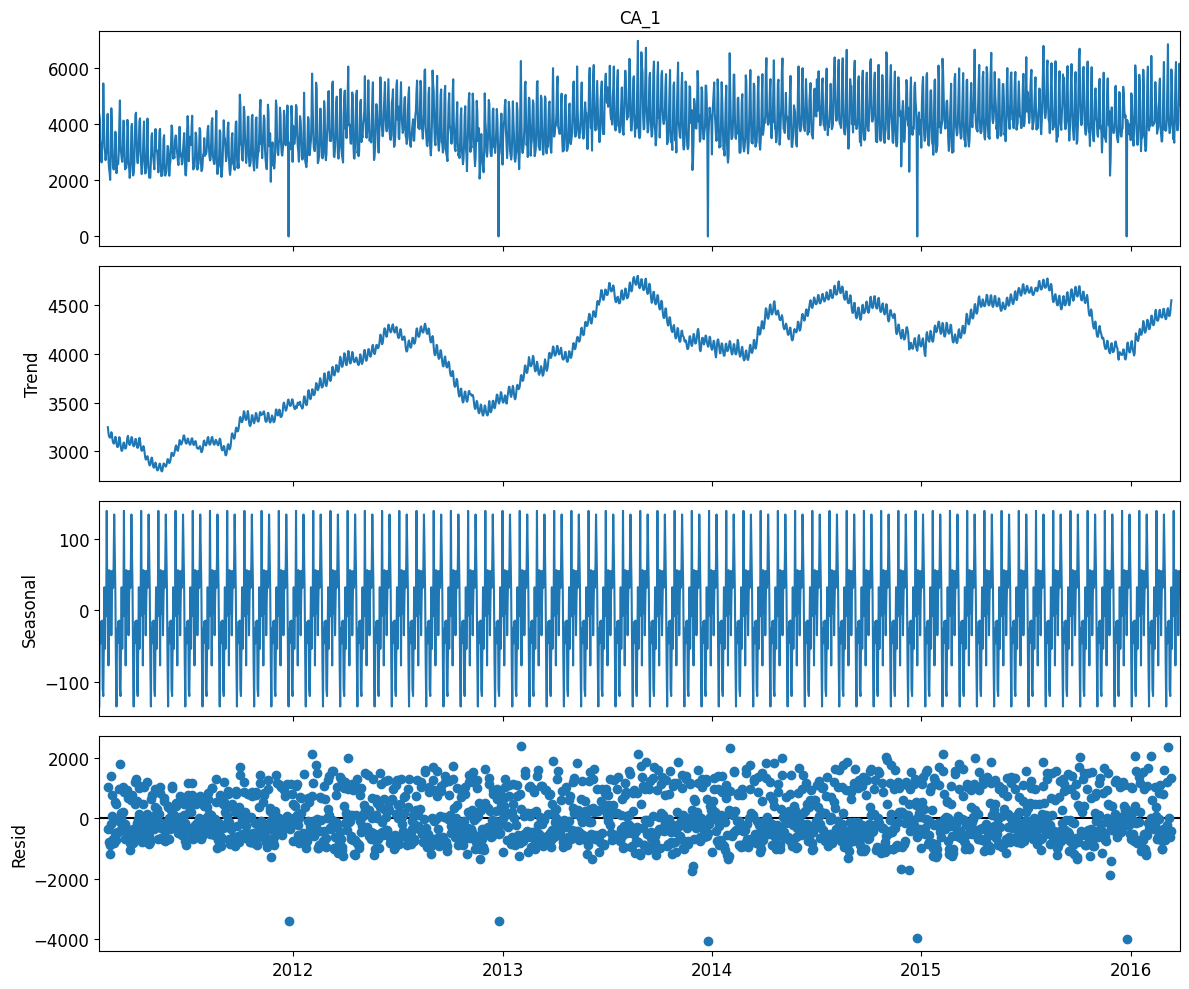

In [63]:
from pylab import rcParams
decompose.plot()
rcParams['figure.figsize'] = 12, 10
rcParams['axes.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12

#### Check whether time series data is stationary or not, use Augmented Dickey Fuller Test

In [64]:
from statsmodels.tsa.stattools import adfuller
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***********************Augmented Dickey Fuller Test***********************", end = "\n\n")
    labels = ['ADF Test Statistics', 'p-value', 'Lag', 'No. of Obervations']
    for a,b in zip(result, labels):
        print(b + ": " + str(a))
    if result[1]<=0.05:
        print("Strong Evidence Against Null Hypothesis and The Timeseries is STATIONARY")
    else:
        print("Weak Evidence Against Null Hypothesis and the Timeseries is NON-STATIONARY")

adf_check(CA_1_train['CA_1'])

***********************Augmented Dickey Fuller Test***********************

ADF Test Statistics: -2.0841934426713733
p-value: 0.2509178127309827
Lag: 26
No. of Obervations: 1858
Weak Evidence Against Null Hypothesis and the Timeseries is NON-STATIONARY


#### As the series is non-stationary, we need to make it stationary first

In [65]:
# Add the 1st Diff column to weekly dataset
CA_1_train['1st Diff'] = CA_1_train['CA_1'] - CA_1_train['CA_1'].shift(1)

In [66]:
CA_1_train.head()

,CA_1,1st Diff
date,,
2011-01-29,4337,NaN
2011-01-30,4155,-182.0
2011-01-31,2816,-1339.0
2011-02-01,3051,235.0
2011-02-02,2630,-421.0


In [67]:
adf_check(CA_1_train['1st Diff'].dropna())

***********************Augmented Dickey Fuller Test***********************

ADF Test Statistics: -20.420580139737655
p-value: 0.0
Lag: 26
No. of Obervations: 1857
Strong Evidence Against Null Hypothesis and The Timeseries is STATIONARY


#### Check if seasonal timeseries with period of 30 days is statinary or not¶

In [68]:
CA_1_train['seasonality'] = CA_1_train['CA_1'] - CA_1_train['CA_1'].shift(30)

In [69]:
adf_check(CA_1_train['seasonality'].dropna())

***********************Augmented Dickey Fuller Test***********************

ADF Test Statistics: -7.055833359423898
p-value: 5.378485181892237e-10
Lag: 22
No. of Obervations: 1832
Strong Evidence Against Null Hypothesis and The Timeseries is STATIONARY


#### Indentify the below parameters for Trend and Seasonality in time series
#### TREND parameters are: p --> partial auto-correlation, d --> difference or lag to make the series stationary, q --> Moving Avg
    p = ?, d = 1, q = ?
#### SEASONALITY parameters are: P --> partial auto-correlation, D --> difference or lag to make the series stationary, Q --> Moving Avg
    P = ?, D = 1, Q = ?

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

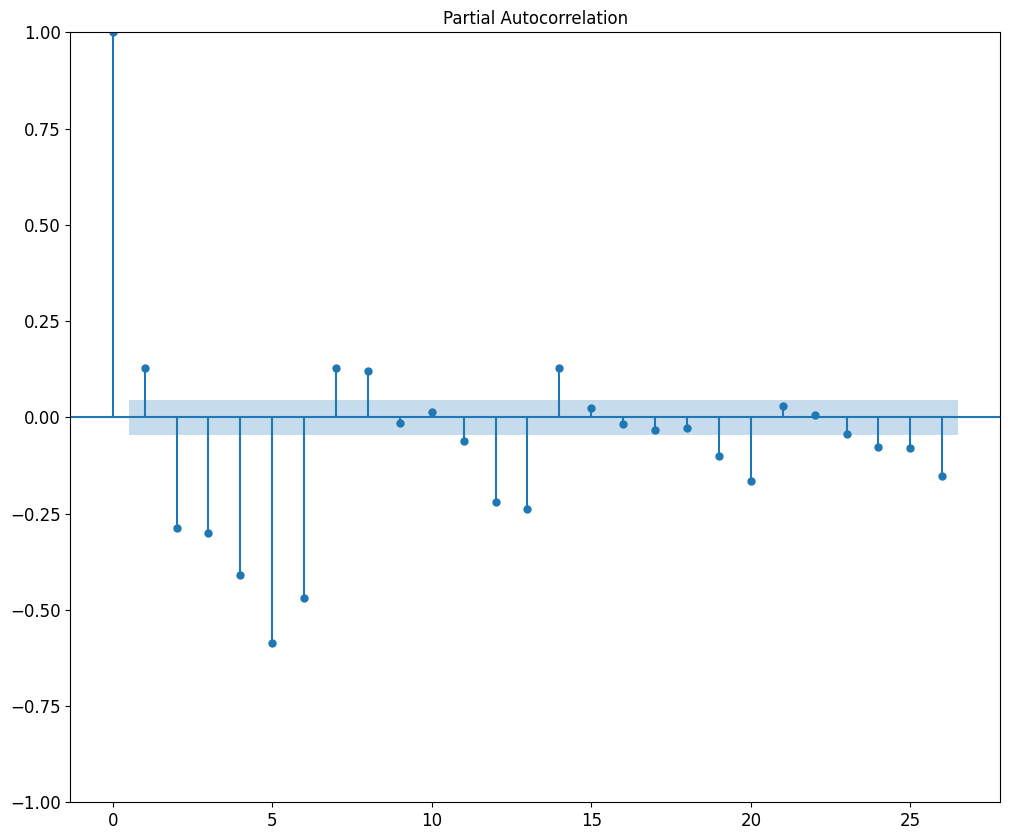

<Figure size 1200x1000 with 0 Axes>

In [71]:
plot_pacf(CA_1_train['1st Diff'].dropna(), lags = 26)
plt.show()
plt.tight_layout()

# Below graph shows the p = 1

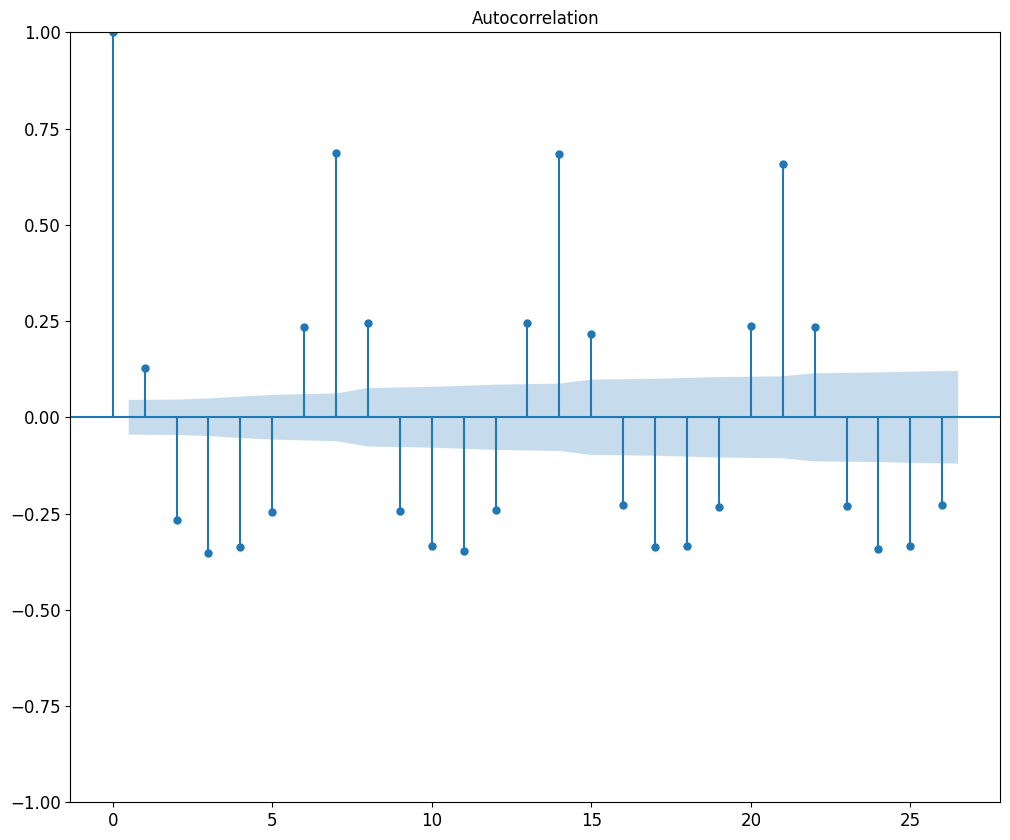

In [72]:
plot_acf(CA_1_train['1st Diff'].dropna(), lags = 26)
plt.show()

# Below graph shows the values of q = 1

#### TREND Parameters are: p = 1, d = 1, q = 1

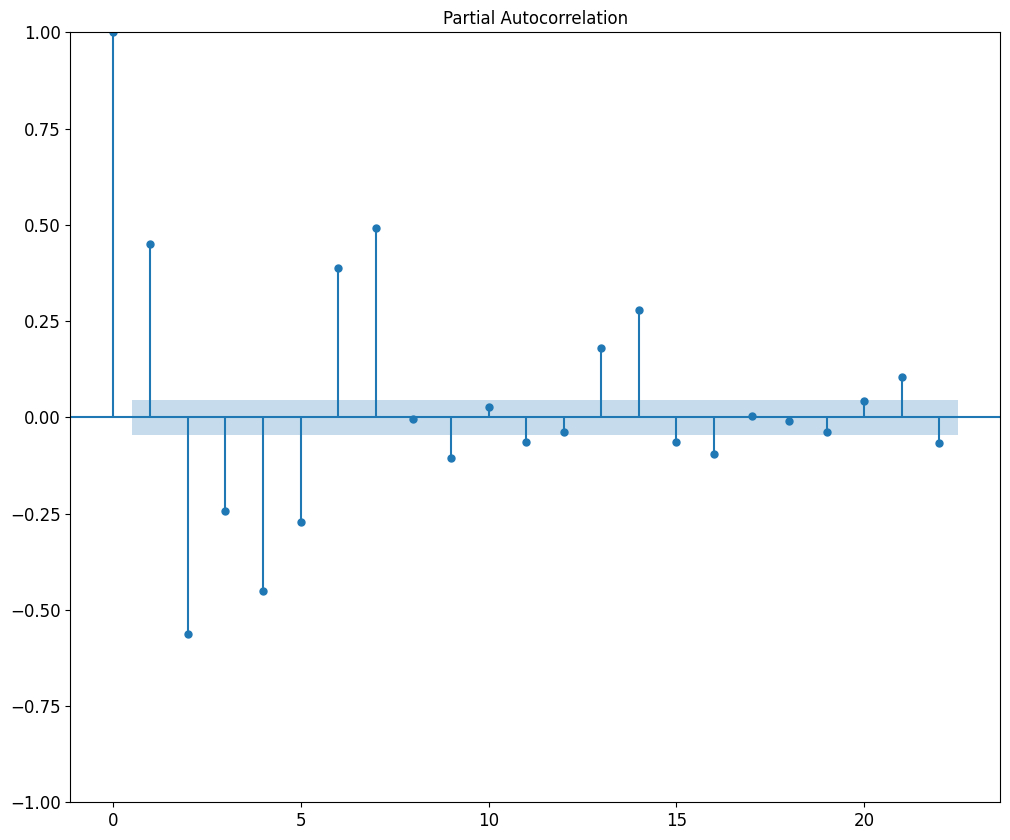

In [73]:
plot_pacf(CA_1_train['seasonality'].dropna(), lags = 22)
plt.show()

# Below graph shows P = 1

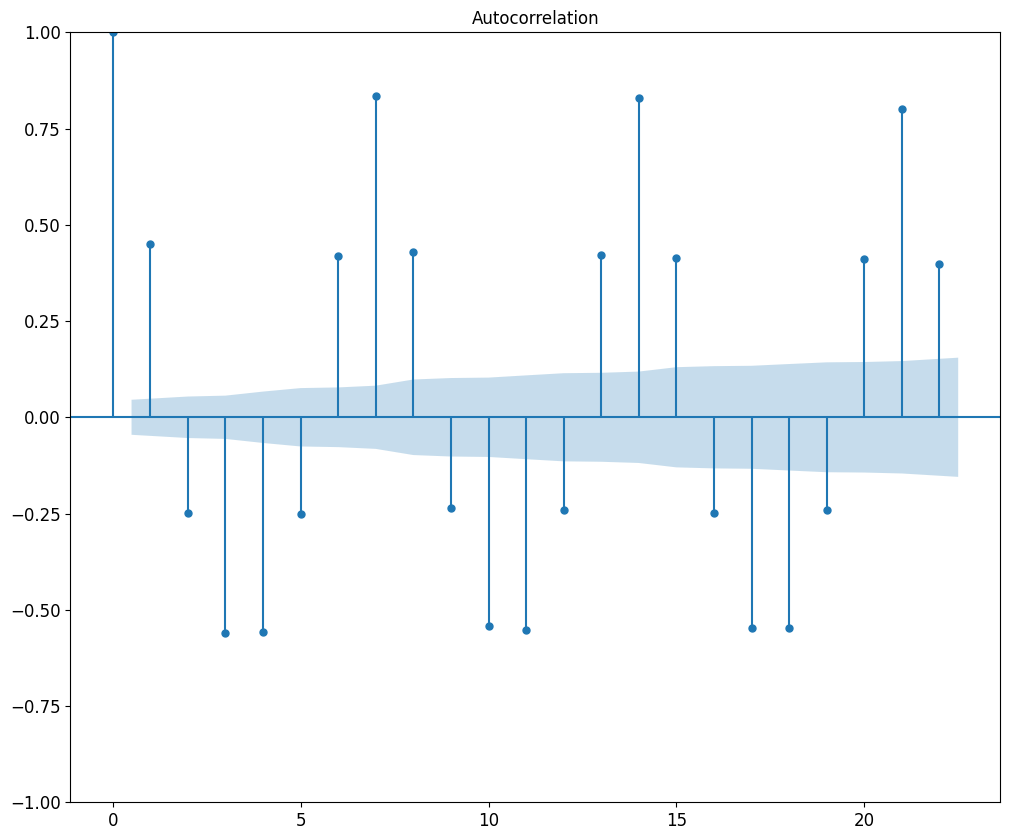

In [74]:
plot_acf(CA_1_train['seasonality'].dropna(), lags = 22)
plt.show()

# Below graph shows Q = 1

#### SEASONALITY Parameters are: P = 1, D = 1, Q = 1

### Build SARIMX Model

In [75]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [76]:
model = sm.tsa.statespace.SARIMAX(CA_1_train['CA_1'], order = (1,1,1), seasonal_order=(1,1,1,30), enforce_stationarity=True, enforce_invertibility=False)

In [77]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               CA_1   No. Observations:                 1885
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood              -15182.643
Date:                            Thu, 16 May 2024   AIC                          30375.286
Time:                                    17:35:20   BIC                          30402.911
Sample:                                01-29-2011   HQIC                         30385.468
                                     - 03-27-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9963      0.033    -30.088      0.000      -1.061      -0.931
ma.L1          0.9970      0.032     31.495      0.000       0.935       1.059
ar.S.L30      -0.2298      0.022    -10.279      0.000      -0.274      -0.186
ma.S.L30      -1.0000      0.028    -35.615      0.000      -1.055      -0.945
sigma2      7.135e+05   3.94e-08   1.81e+13      0.000    7.14e+05    7.14e+05
===================================================================================
Ljung-Box (L1) (Q):                  31.90   Jarque-Bera (JB):                71.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.38e+27. Standard errors may be unstable.
"""

#### Iterate over diffrent values of parameters and choose those giving minimum AIC value

In [81]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in pdq]

import warnings
warnings.filterwarnings('ignore')

In [82]:
param_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(CA_1_train['CA_1'], order = param, seasonal_order=param_seasonal, enforce_stationarity= False, enforce_invertibility=False)
            result = model.fit()
            param_list.append((param, param_seasonal, result.aic))
            print(f"ARIMA {param}x{param_seasonal} - AIC : {result.aic}")
        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 30) - AIC : 36726.62272443005
ARIMA (0, 0, 0)x(0, 0, 1, 30) - AIC : 34972.919095415586
ARIMA (0, 0, 0)x(0, 1, 0, 30) - AIC : 31826.848567668407
ARIMA (0, 0, 0)x(0, 1, 1, 30) - AIC : 30221.43148155114
ARIMA (0, 0, 0)x(1, 0, 0, 30) - AIC : 31810.40920155989
ARIMA (0, 0, 0)x(1, 0, 1, 30) - AIC : 30733.823580666245
ARIMA (0, 0, 0)x(1, 1, 0, 30) - AIC : 31120.502453900546
ARIMA (0, 0, 0)x(1, 1, 1, 30) - AIC : 30215.032976066344
ARIMA (0, 0, 1)x(0, 0, 0, 30) - AIC : 35338.86014125205
ARIMA (0, 0, 1)x(0, 0, 1, 30) - AIC : 32671.69079330888
ARIMA (0, 0, 1)x(0, 1, 0, 30) - AIC : 31050.101230390846
ARIMA (0, 0, 1)x(0, 1, 1, 30) - AIC : 29407.40900956542
ARIMA (0, 0, 1)x(1, 0, 0, 30) - AIC : 31017.891381414
ARIMA (0, 0, 1)x(1, 0, 1, 30) - AIC : 29928.17638945367
ARIMA (0, 0, 1)x(1, 1, 0, 30) - AIC : 30249.961560282696
ARIMA (0, 0, 1)x(1, 1, 1, 30) - AIC : 29394.619464739644
ARIMA (0, 1, 0)x(0, 0, 0, 30) - AIC : 30820.010690991454
ARIMA (0, 1, 0)x(0, 0, 1, 30) - AIC : 301

In [107]:
aic_list = []
for i,j in enumerate(param_list):
    aic_val = aic_list.append(j[2])
min_aic_no = [i for i,j in enumerate(aic_list) if j == min(aic_list)]
print("Parameters associated with min AIC value are -->:", param_list[min_aic_no[0]])

Parameters associated with min AIC value are -->: ((1, 0, 1), (1, 1, 1, 30), 29289.139839712887)


In [109]:
model = sm.tsa.statespace.SARIMAX(CA_1_train['CA_1'], order = (1,0,1), seasonal_order=(1,1,1,30), enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               CA_1   No. Observations:                 1885
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 30)   Log Likelihood              -14639.570
Date:                            Thu, 16 May 2024   AIC                          29289.140
Time:                                    17:56:31   BIC                          29316.681
Sample:                                01-29-2011   HQIC                         29299.300
                                     - 03-27-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3503      0.038      9.327      0.000       0.277       0.424
ma.L1          0.4388      0.036     12.202      0.000       0.368       0.509
ar.S.L30      -0.1375      0.030     -4.575      0.000      -0.196      -0.079
ma.S.L30      -0.8899      0.014    -65.379      0.000      -0.917      -0.863
sigma2      5.347e+05   1.41e+04     38.026      0.000    5.07e+05    5.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               135.52
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict The Given data using Above Model

In [123]:
print(CA_1_train.tail(), end = '\n\n')
print(len(CA_1_train))

            CA_1  1st Diff  seasonality
date                                   
2016-03-23  3770      -6.0       -135.0
2016-03-24  3970     200.0        357.0
2016-03-25  4904     934.0       1535.0
2016-03-26  6139    1235.0       2743.0
2016-03-27  4669   -1470.0        582.0

1885


In [124]:
print(CA_1.tail(), end = '\n\n')
print(len(CA_1))

            CA_1     forecast
date                         
2016-04-20  3722  4284.494794
2016-04-21  3709  4345.678771
2016-04-22  4387  4466.551476
2016-04-23  5577  3995.823614
2016-04-24  6113  4014.743057

1913


In [129]:
CA_1['forecast'] = result.predict(start = '2016-03-28', end = '2016-04-24', dynamic = True) 

In [130]:
CA_1.tail(50)

,CA_1,forecast
date,,
2016-03-06,6829,NaN
2016-03-07,4393,NaN
2016-03-08,3930,NaN
2016-03-09,3672,NaN
2016-03-10,3877,NaN
2016-03-11,4049,NaN
2016-03-12,5933,NaN
2016-03-13,5446,NaN
2016-03-14,4190,NaN


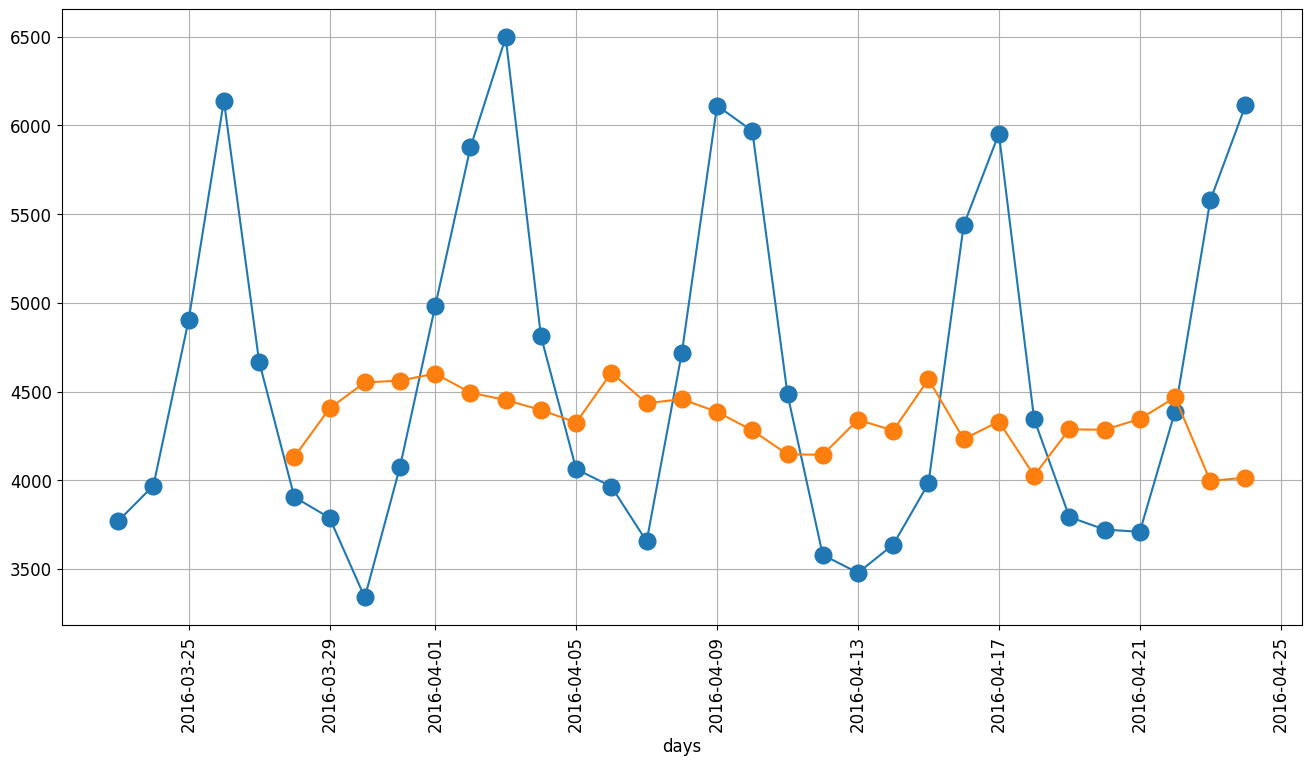

In [131]:
plt.figure(figsize = (16,8))
x = list(CA_1.index[1880:])
y1 = list(CA_1['CA_1'][1880:])
y2 = list(CA_1['forecast'][1880:])
plt.plot(x,y1, marker='o',markersize=12)
plt.plot(x,y2, marker='o',markersize=12)
plt.xlabel('days')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

#### Let's build the same model with auto-arima

In [40]:
# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# get actual data for CA_1
data_actual = CA_1_train['CA_1']

# set seasonal to True
seasonal = True

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual, 
                      m=1,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31356.842, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30455.139, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=30389.094, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36746.215, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=30240.631, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30140.596, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=30138.193, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=30139.082, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30141.065, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=30801.133, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.880 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1885
Model:               SARIMAX(2, 0, 0)   Log Likeliho

#### Let's automate the overall model building for all the time-serieses present in the dataset

In [41]:
# Create the function which returns the forecasted values for given period along with upper and lower bounds
def get_forecast_group(data, n_periods, seasonal):
    # Initialize empty lists to store forecast data
    data_fc = []
    data_lower = []
    data_upper = []
    data_aic = []
    data_fitted = []
    
    # Iterate over columns in data
    for group in data.columns:
        # Fit an ARIMA model using the auto_arima function
        data_actual = data[group]
        model = pm.auto_arima(data_actual, 
                              start_p=0, start_q=0,
                              max_p=3, max_q=3, # maximum p and q
                              test='adf',         # use adftest to find optimal 'd'
                              seasonal=seasonal,  # TRUE if seasonal series
                              m=1,               # frequency of series
                              d=None,             # let model determine 'd'
                              D=None,             # let model determine 'D'
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)
        
        # Generate forecast and confidence intervals for n_periods into the future
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        index_of_fc = pd.date_range(pd.to_datetime(data_actual.index[-1])  + relativedelta(days = +1), periods = n_periods, freq = 'D')
        
        # Append forecast data to lists
        data_fc.append(fc)
        data_lower.append(confint[:, 0])
        data_upper.append(confint[:, 1])
        data_aic.append(model.aic())
        data_fitted.append(model.fittedvalues())

        # Create dataframes for forecast, lower bound, and upper bound
        df_fc = pd.DataFrame(index = index_of_fc)
        df_lower = pd.DataFrame(index = index_of_fc)
        df_upper = pd.DataFrame(index = index_of_fc)
        df_aic = pd.DataFrame()
        df_fitted = pd.DataFrame(index = data_actual.index)

    # Populate dataframes with forecast data
    i = 0
    for group in data.columns:
        df_fc[group] = data_fc[i][:]
        df_lower[group] = data_lower[i][:]
        df_upper[group] = data_upper[i][:]
        df_aic[group] = data_aic[i]
        df_fitted[group] = data_fitted[i][:]
        i = i + 1
    
    return df_fc, df_lower, df_upper, df_aic, df_fitted

In [42]:
# Create the function which return the signle dataframe including the forecasts for prediction length
def get_combined_data(df_actual, df_forecast):
    # Assign input data to separate variables
    data_actual = df_actual
    data_forecast = df_forecast
    
    # Add a 'desc' column to indicate whether the data is actual or forecast
    data_actual['desc'] = 'Actual'
    data_forecast['desc'] = 'Forecast'
    
    # Combine actual and forecast data into a single DataFrame and reset the index
    df_act_fc = pd.concat([data_actual, data_forecast]).reset_index()
    
    # Rename the index column to 'month'
    df_act_fc = df_act_fc.rename(columns={'index': 'date'})

    # Return the combined DataFrame
    return df_act_fc

In [43]:
# Create function returning the plots of Actual Vs Forecasts for given time series
def get_plot_fc(df_act_fc, df_lower, df_upper, df_fitted, nrow, ncol, figsize_x, figsize_y, category_field_values,  title, ylabel):
    # Set the years and months locators and formatter
    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')

    # Melt the data for plotting
    df_melt = df_act_fc.melt(id_vars = ['date', 'desc'])
    df_melt_fitted = df_fitted.reset_index().melt(id_vars = ['date'])

    # Create subplots and set the title
    fig, axs = plt.subplots(nrow, ncol, figsize = (figsize_x,figsize_y))
    fig.suptitle(title, size = 20, y = 0.90)

    i = 0
    j = 0
    for cat in category_field_values:
        # Filter data for the current category
        df_plot = df_melt[df_melt['variable'] == cat]
        df_lower_plot = df_lower[cat]
        df_upper_plot = df_upper[cat]
        df_plot_fitted = df_melt_fitted[df_melt_fitted['variable'] == cat]

        # Plot the actual and forecasted data
        sns.lineplot(ax = axs[j,i], data = df_plot, x = 'date', y = 'value', hue = 'desc', marker = 'o')
        # Plot the fitted data with dashed lines
        sns.lineplot(ax = axs[j,i], data = df_plot_fitted, x = 'date', y = 'value', dashes=True, alpha = 0.5)
        # Set the x-label, y-label, and fill between the lower and upper bounds of the forecast
        axs[j, i].set_xlabel(cat, size = 15)
        axs[j, i].set_ylabel(ylabel, size = 15)
        axs[j,i].fill_between(df_lower_plot.index, 
                      df_lower_plot, 
                      df_upper_plot, 
                      color='k', alpha=.15)
        # Set the legend and y-limits
        axs[j,i].legend(loc = 'upper left')
        axs[j,i].set_ylim([df_plot['value'].min()-1000, df_plot['value'].max()+1000])

        # Set the x-axis tickers and format
        axs[j,i].xaxis.set_major_locator(years)
        axs[j,i].xaxis.set_major_formatter(years_fmt)
        axs[j,i].xaxis.set_minor_locator(months)

        i = i + 1 
        if i >= ncol:
            j = j + 1
            i = 0

    plt.show()

In [44]:
from dateutil.relativedelta import relativedelta
import pmdarima as pm

In [45]:
df_fc, df_lower, df_upper, df_aic, df_fitted = get_forecast_group(data = Store_sales_only_train, n_periods=28, seasonal=True)

In [46]:
df_act_fc = get_combined_data(df_actual = Store_sales_only_train, df_forecast = df_fc)

In [47]:
import matplotlib.dates as mdates
import seaborn as sns

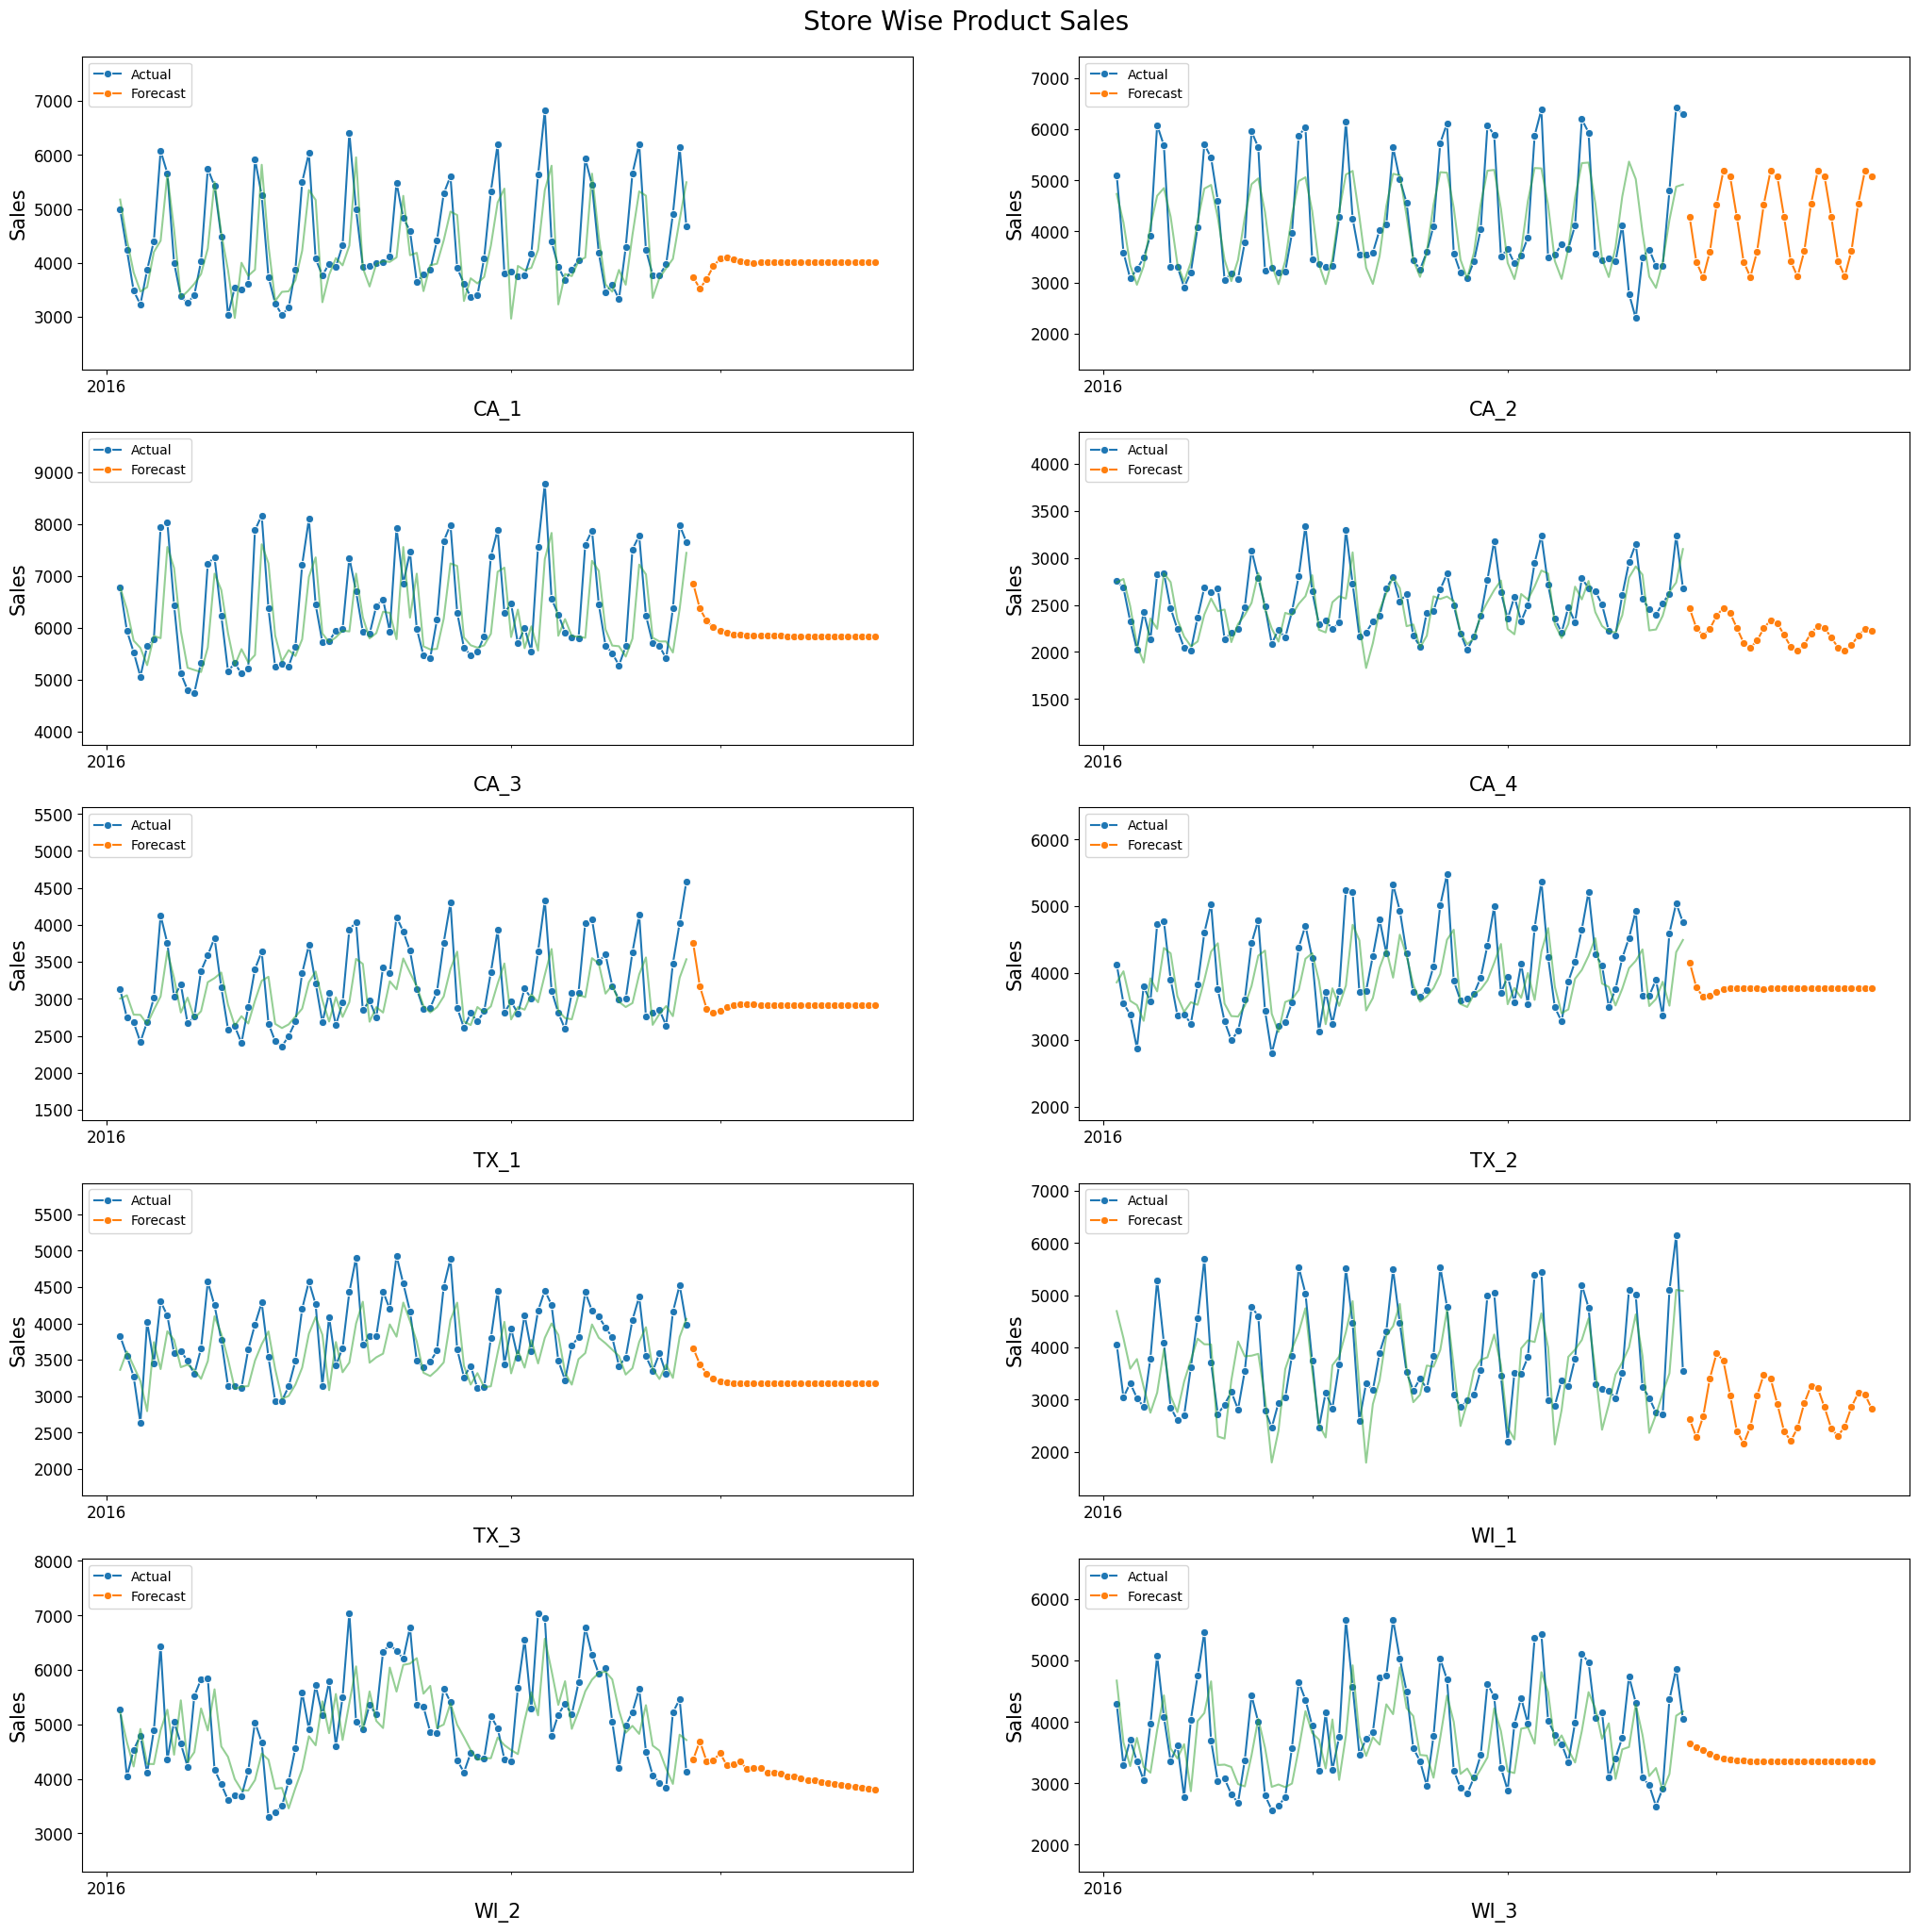

In [48]:
get_plot_fc(df_act_fc[1800:], 
            df_lower[1800:], 
            df_upper[1800:], 
            df_fitted[1800:],
            nrow = 5, ncol = 2, 
            figsize_x = 25, figsize_y = 25,
            category_field_values = df_act_fc.drop(['date', 'desc'], axis = 1).columns, 
            title = 'Store Wise Product Sales',
            ylabel = 'Sales')